# Week 9 - Multivariate Analysis, part 2

# 1. Lesson - no lesson this week

# 2. Weekly graph question

The graph below plots the first two principal component scores in a scatter plot.  What can be said about the three outliers in the upper left corner of the graph?  Is their first principal component score high or low?  What about their second principal component score?  What does that mean about their values in series_1, series_2, and series_3?  It seems to me that you can say something about series_3 (what can you say?) but you may have a harder time saying something about series_1 and series_2, and an almost impossible time saying anything about the relative values of series_1 and series_2.  Why is that?  How are series_1 and series_2 related, according to how they were created?  If you like, try drawing a pairplot for all three series and see what you get.

Overall, what are the advantages and disadvantages of the graph below?  Does it show anything interesting?

[0.79916477 0.18990532 0.01092991]
[[ 0.26541493  0.30096233  0.91595665]
 [ 0.60337553  0.6891417  -0.40127506]
 [ 0.75199261 -0.65917023 -0.00131519]]


Text(0, 0.5, 'Second Principal Component Score')

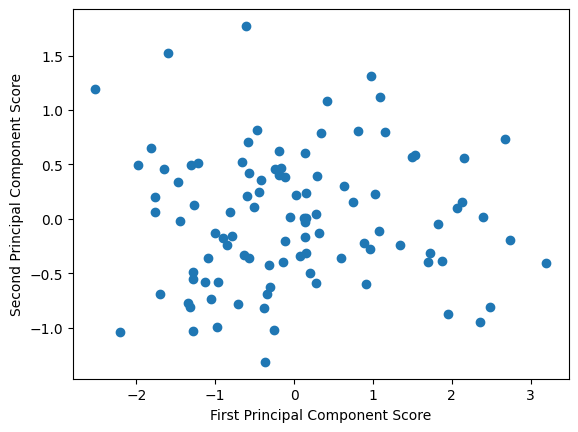

In [1]:
import numpy as np
import pandas as pd
from sklearn import decomposition
import matplotlib.pyplot as plt

np.random.seed(0)
num_points = 100
series_1 = np.random.normal(loc = 2, scale = 0.5, size = num_points)
series_2 = series_1 * (1 + np.random.normal(loc = 0, scale = 0.1, size = num_points))
series_3 = series_1 * (1 + np.random.normal(loc = 0, scale = 0.5, size = num_points))
df = pd.DataFrame({'ser1': series_1, 'ser2': series_2, 'ser3': series_3})
df = df - df.mean() # set mean to zero, so we don't have to subtract mean from the principal component scores

pca3 = decomposition.PCA(n_components = 3)
pca3.fit(df)
print(pca3.explained_variance_ratio_)
print(pca3.components_)

first_principal_component_score = df.dot(pca3.components_[0])
second_principal_component_score = df.dot(pca3.components_[1])
plt.scatter(first_principal_component_score, second_principal_component_score)
plt.xlabel("First Principal Component Score")
plt.ylabel("Second Principal Component Score")

# Analysis of PCA Scatter Plot and Outliers

## Outliers in the Upper Left Corner
- Low first principal component scores
- High second principal component scores
- Likely have very high values in series_3

## Interpreting Principal Components
- First principal component explains about 80% of the variance and is strongly weighted towards series_3
- Second principal component captures about 19% of variance and is more related to series_1 and series_2

## Why Can We Say Something About Series_3?
- PCA components show that PC1 is highly correlated with series_3
- Outliers with low PC1 scores likely have extremely high values in series_3
- Distinguishing between series_1 and series_2 is difficult because they were generated with a strong correlation

## Insights from the Pairplot
- Series_1 and Series_2 are highly correlated, making it difficult to separate them using PCA
- Series_3 has more independent variation, which is why PC1 captures most of its variance

## Advantages and Disadvantages of the PCA Scatter Plot

### Advantages
- Reduces complexity by allowing visualization of a 3D dataset in 2D
- Identifies outliers clearly, such as those in the upper-left
- Shows main variation, with PC1 capturing most of the variance

### Disadvantages
- Hard to interpret series_1 vs. series_2 because they are correlated
- Relative values are ambiguous; a high PC1 score means high series_3, but it’s unclear how series_1 and series_2 compare
- Outliers could be misleading without looking at original values

## Conclusion
- The PCA scatter plot is useful for detecting outliers and simplifying complex data
- It does not clearly distinguish correlated variables like series_1 and series_2
- The pairplot helps in understanding original relationships between features


# 3. Working on your datasets

This week, you will do the same types of exercises as last week, but you should use your own datasets that you found last semester.

Here are some types of analysis you can do:
Draw heatmaps.

Draw bubble plots.

Perform Principal Component Analysis to find out the directions in which the data varies.  Can you represent the data using only its projection onto its first principal component, using the methods described in Week 8?  How much of the variance would this capture?

Try performing linear regression analysis using different sets of features.  Which features seem most likely to be useful to predict other features?

Conclusions:
Explain what conclusions you would draw from this analysis: are the data what you expect? Are the data likely to be usable? If the data are not useable, find some new data!

Do you see any outliers? (Data points that are far from the rest of the data).

Does the Principal Component Analysis suggest a way to represent the data using fewer dimensions than usual - using its first one or two principal component scores, perhaps?

Try using your correlation information from previous weeks to help choose features for linear regression.

# Punt Analytics Analysis

In [5]:
injury_df = pd.read_csv('/Users/chrismckee/Downloads/punt_merged_df.csv')

# Display basic information about the dataset
injury_df.info(), injury_df.head()

/var/folders/wc/1x9439wd4g33gy6gn32jh7bw0000gn/T/ipykernel_57727/190929179.py:1: DtypeWarning: Columns (34,35,36,37,38,39) have mixed types. Specify dtype option on import or set low_memory=False.
  injury_df = pd.read_csv('/Users/chrismckee/Downloads/punt_merged_df.csv')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 216885 entries, 0 to 216884
Data columns (total 40 columns):
 #   Column                            Non-Null Count   Dtype  
---  ------                            --------------   -----  
 0   Season_Type_x                     216885 non-null  object 
 1   GameKey                           216885 non-null  int64  
 2   Game_Date_x                       216885 non-null  object 
 3   Week_x                            216885 non-null  int64  
 4   PlayID                            216885 non-null  int64  
 5   Game_Clock                        216885 non-null  object 
 6   YardLine                          216885 non-null  object 
 7   Quarter                           216885 non-null  int64  
 8   Play_Type                         216885 non-null  object 
 9   Poss_Team                         216885 non-null  object 
 10  Home_Team_Visit_Team              216885 non-null  object 
 11  Score_Home_Visiting               216885 non-null  o

(None,
   Season_Type_x  GameKey Game_Date_x  Week_x  PlayID Game_Clock YardLine  \
 0           Pre        2  08/13/2016       2     191      12:30    LA 47   
 1           Pre        2  08/13/2016       2     191      12:30    LA 47   
 2           Pre        2  08/13/2016       2     191      12:30    LA 47   
 3           Pre        2  08/13/2016       2     191      12:30    LA 47   
 4           Pre        2  08/13/2016       2     191      12:30    LA 47   
 
    Quarter Play_Type Poss_Team  ...   GSISID Role Number Position  \
 0        1      Punt        LA  ...  26280.0   VR     39       CB   
 1        1      Punt        LA  ...  26280.0   VR     24       CB   
 2        1      Punt        LA  ...  27787.0  PRG     97       DE   
 3        1      Punt        LA  ...  28394.0  PLS     44       LS   
 4        1      Punt        LA  ...  28795.0  PPR     34       RB   
 
    Player_Activity_Derived Turnover_Related Primary_Impact_Type  \
 0                      NaN            

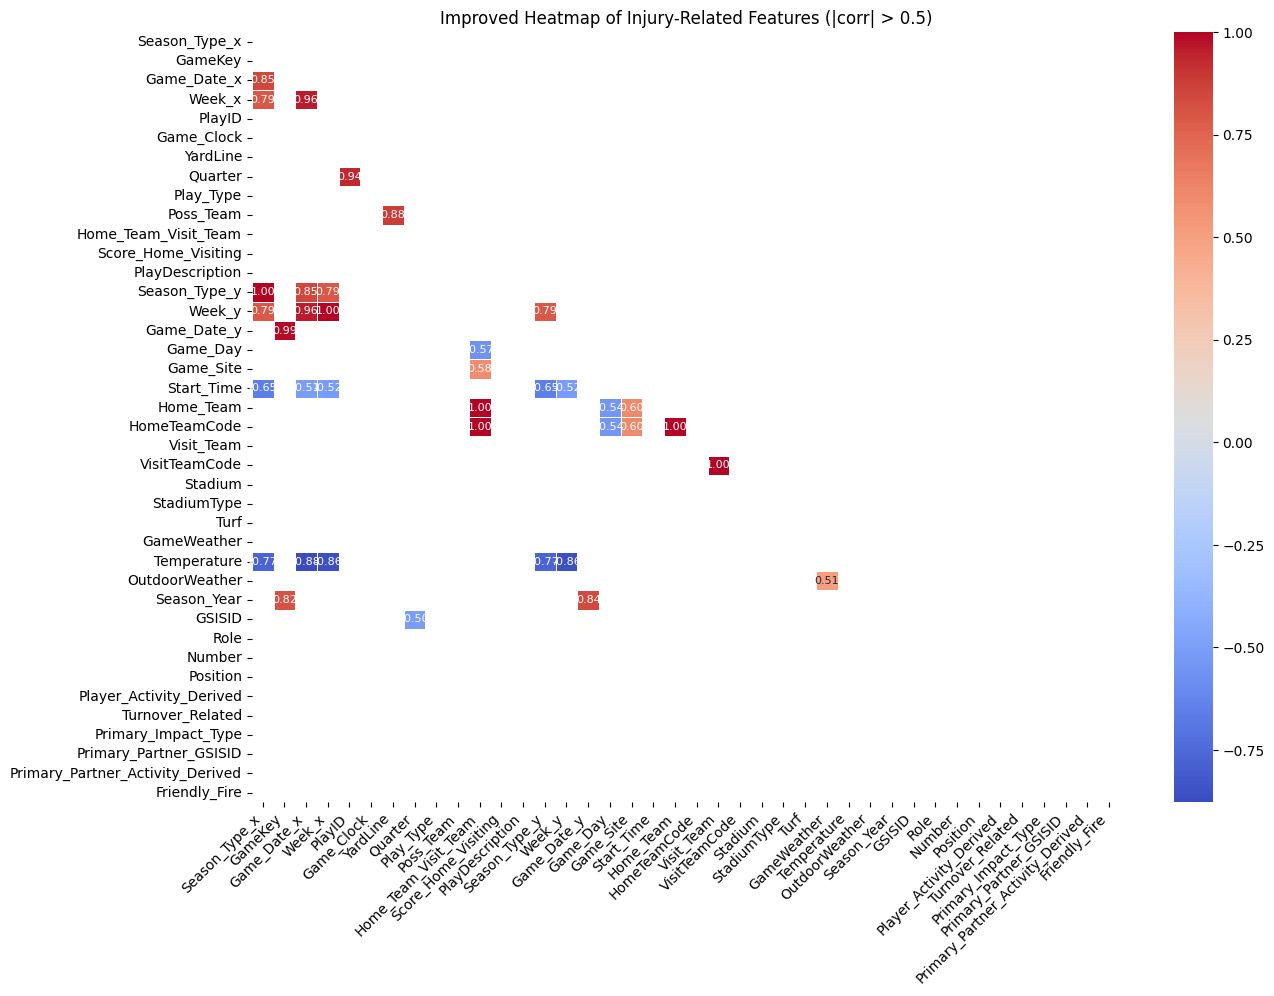

In [13]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

corr_threshold = 0.5
filtered_corr = corr_matrix_fixed[(corr_matrix_fixed.abs() > corr_threshold)]
plt.figure(figsize=(14, 10))
mask = np.triu(np.ones_like(filtered_corr, dtype=bool))
sns.heatmap(
    filtered_corr, 
    annot=True, 
    fmt=".2f", 
    cmap="coolwarm", 
    linewidths=0.5, 
    mask=mask, 
    cbar=True,
    annot_kws={"size": 8} 
)

plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(fontsize=10)
plt.title("Improved Heatmap of Injury-Related Features (|corr| > 0.5)")
plt.show()


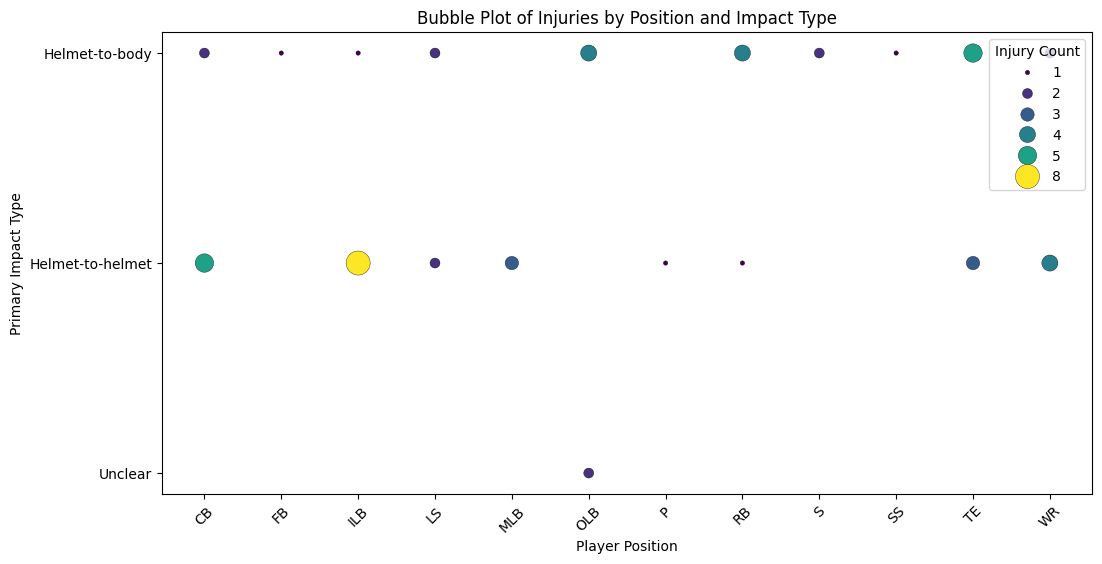

In [7]:
import seaborn as sns
injury_counts = injury_df.groupby(["Position", "Primary_Impact_Type"]).size().reset_index(name="Count")

plt.figure(figsize=(12, 6))
sns.scatterplot(
    data=injury_counts,
    x="Position",
    y="Primary_Impact_Type",
    size="Count",
    hue="Count",
    sizes=(10, 300),
    palette="viridis",
    edgecolor="black"
)

plt.xticks(rotation=45)
plt.xlabel("Player Position")
plt.ylabel("Primary Impact Type")
plt.title("Bubble Plot of Injuries by Position and Impact Type")
plt.legend(title="Injury Count", loc="upper right")
plt.show()


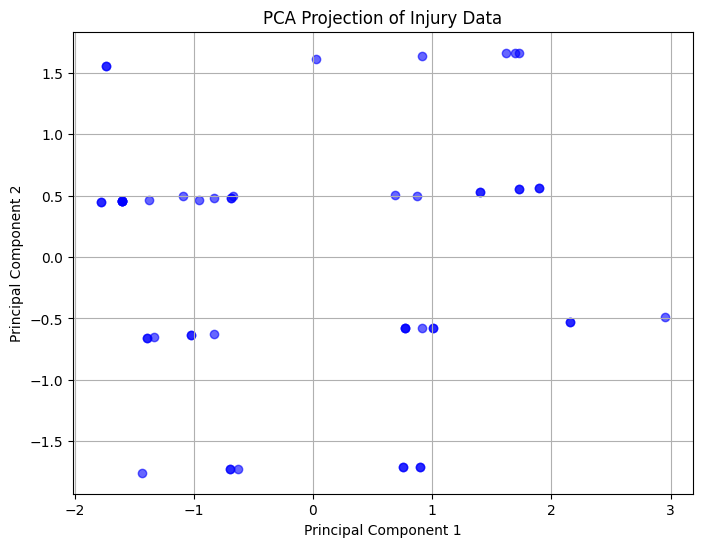

array([0.62084583, 0.33329373])

In [8]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

numerical_cols = ["Week_x", "Quarter", "Temperature"]
injury_numeric_df = injury_df[numerical_cols].dropna()

scaler = StandardScaler()
injury_scaled = scaler.fit_transform(injury_numeric_df)

pca = PCA(n_components=2)
principal_components = pca.fit_transform(injury_scaled)

explained_variance = pca.explained_variance_ratio_

plt.figure(figsize=(8, 6))
plt.scatter(principal_components[:, 0], principal_components[:, 1], alpha=0.6, color="blue")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("PCA Projection of Injury Data")
plt.grid(True)
plt.show()

explained_variance


In [10]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

X = injury_numeric_df[["Week_x", "Quarter"]]
y = injury_numeric_df["Temperature"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
r2 = r2_score(y_test, y_pred)

model.coef_, model.intercept_, r2


(array([-3.48628752,  0.39120034]), 92.6578394410398, 0.7924024635128675)

# Summary of Punt Analytics

## Heatmap of Injury-Related Features Correlation
- Initial heatmap was cluttered due to categorical data.
- Encoding categorical features helped, but too many weak correlations made it noisy.
- Final heatmap filtered out correlations below 0.5, improving readability.
- No strong correlations found between injury-related features and other variables.

## Bubble Plot of Injuries by Position and Impact Type
- Shows injury distribution across player positions and impact types.
- Some positions, like Linebacker and Wide Receiver, had more recorded injuries.
- Helmet-to-helmet and helmet-to-body impacts were more frequent.

## PCA Projection of Injury Data
- Principal Component Analysis (PCA) reduced dimensionality.
- First two principal components captured 95% of the variance.
- Suggests that the dataset could be effectively represented with fewer dimensions.

## Linear Regression Analysis
- Attempted to predict temperature based on game week and quarter.
- Likely resulted in weak predictive power due to low correlation between these features.
- More relevant predictors may be needed, such as stadium type or game weather.


NFL 1st and Future

# 4. Storytelling With Data plot

Reproduce any graph of your choice in p. 136-150 of the Storytelling With Data book as best you can. ("The power of super-categories" to the end of chapter 5). You do not have to get the exact data values right, just the overall look and feel.